In [1]:
import csv
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (4, 3)
plt.rcParams['figure.dpi'] = 100

Example: Uniform Discrete Distribution
--------------------------------------

Text(0, 0.5, 'N')

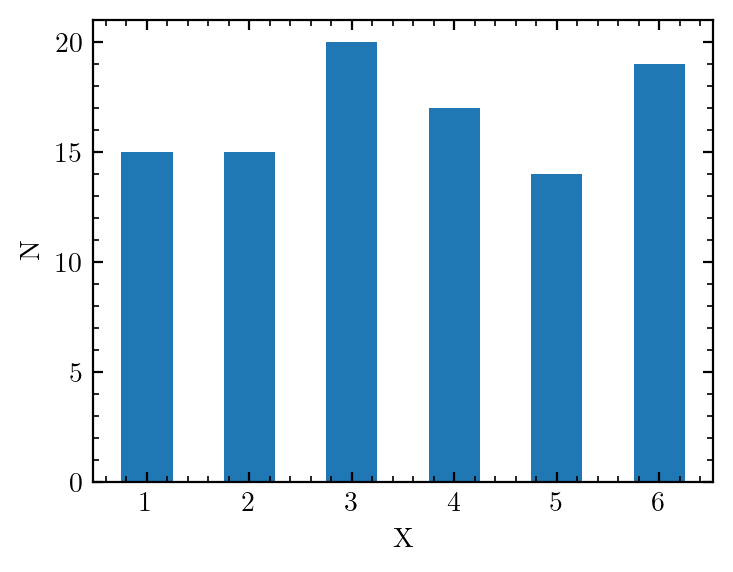

In [2]:
import numpy as np
import matplotlib.pyplot as plt

n = 6
door = np.random.randint(1, n + 1, size=100)
plt.hist(door, bins=np.linspace(0.75, n + 0.25, 2 * n))
plt.xticks(np.arange(1, n+1))
plt.xlabel('X')
plt.ylabel(r'N')

Example: Normal Distribution
----------------------------

Text(0, 0.5, 'Distribution')

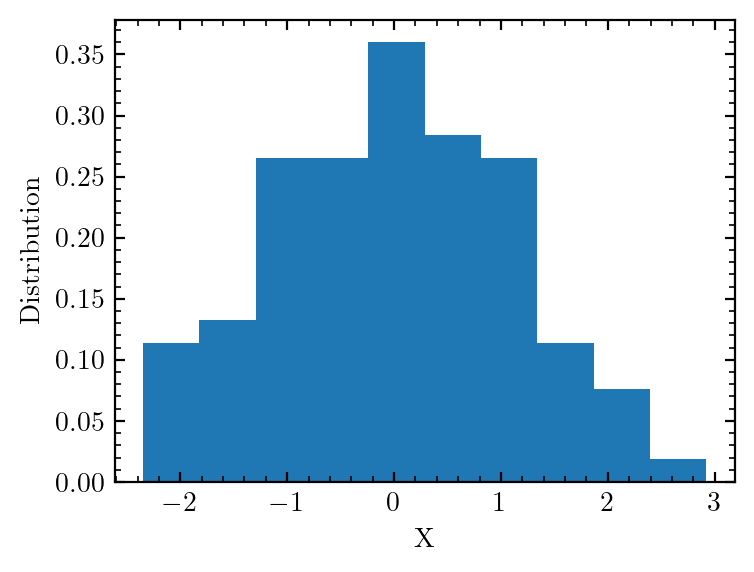

In [3]:
import matplotlib.pyplot as plt
from scipy.stats import norm

mu = 0
sigma = 1.0
door = norm.rvs(loc=mu, scale=sigma, size=100)
plt.hist(door, density=True)
plt.xlabel('X')
plt.ylabel(r'Distribution')

Example: 2D Gaussian
--------------------

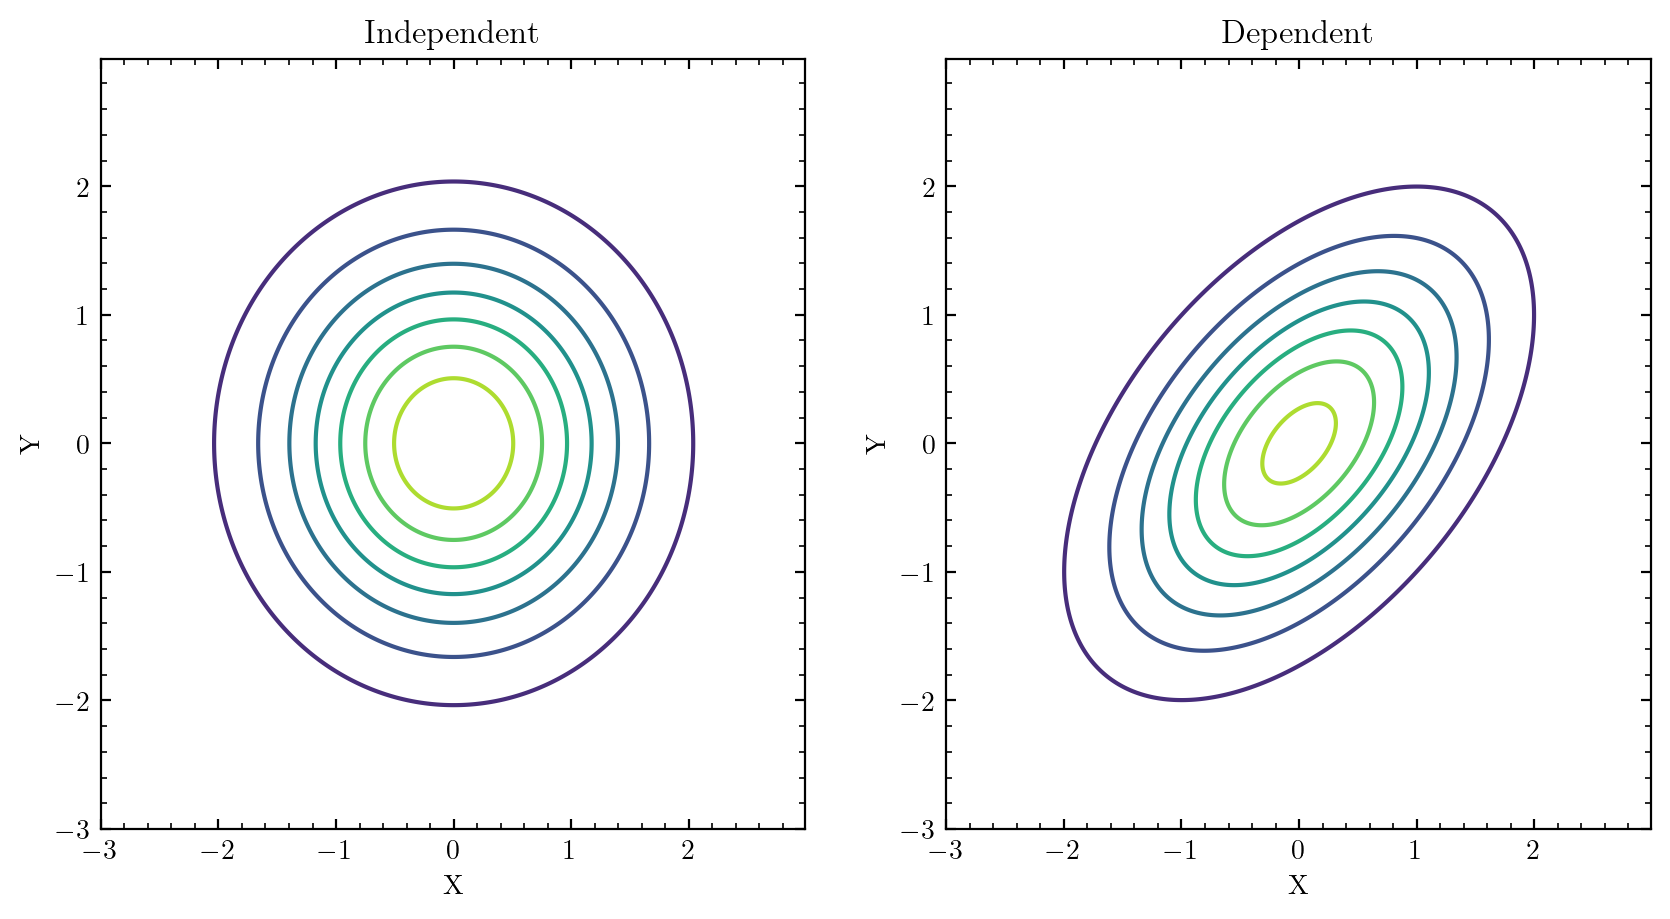

In [4]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import multivariate_normal

door, y = np.mgrid[-3:3:.01, -3:3:.01]
pos = np.dstack((door, y))

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))
ax1.contour(door, y, multivariate_normal([0, 0], [[1, 0], [0, 1]]).pdf(pos))
ax1.set_title('Independent')
ax2.contour(door, y, multivariate_normal([0, 0], [[1, 0.5], [0.5, 1]]).pdf(pos))
ax2.set_title('Dependent')
for ax in [ax1, ax2]:
    ax.set_xlabel('X')
    ax.set_ylabel('Y')

Exercise 1: Normal Distribution
-------------------------------

(a) Draw 10 numbers from a normal distribution with mean $\mu$ of 0 and standard deviation $\sigma$ of 1. What fraction of draws are within [-1, +1]? How many within [-3, +3]?

(b) Repeat the above exercise for $10^6$ draws. How do you fractions compare to the theoretical expectations of $68.3\%$ and $99.7\%$, respectively?

In [12]:
from scipy.stats import norm
import matplotlib.pyplot as plt

def find_in_range(low, high, list):
    count = 0
    for x in list:
        if low <= x <= high:
            count += 1
    print(f"There are {count} numbers within [{low}], [{high}].")

num_nums = 10
mean = 0
sd = 1

print("For ten iterations:")
nums_list = norm.rvs(loc=mean, scale=sd, size=num_nums)
find_in_range(-1, 1, nums_list)
find_in_range(-3, 3, nums_list)

num_nums = pow(10, 6)
print("\nFor one millions iterations:")
nums_list = norm.rvs(loc=mean, scale=sd, size=num_nums)
find_in_range(-1, 1, nums_list)
find_in_range(-3, 3, nums_list)

For ten iterations:
There are 9 numbers within [-1], [1].
There are 10 numbers within [-3], [3].

For one millions iterations:
There are 682693 numbers within [-1], [1].
There are 997309 numbers within [-3], [3].


For one million iterations, my results tend to be around 68,300 and 99,700, which is approximately the normal expectations, indicating that the experiment (and my code) works correctly.

Exercise 2: Coin Flip
---------------------

A coin was flipped $10$ times, yielding heads each time. You suspect that the coin isn't fair, i.e., heads and tails are not equally likely.

(a) Calculate analytically the probability that $10$ coin flips yield the same result each time. Hint: Use that each coin flip is statistically independent.

(b) Verify your result from exercise (a) numerically.

(c) How confident are you that the coin isn't fair?

(a) p = 0.0009765625


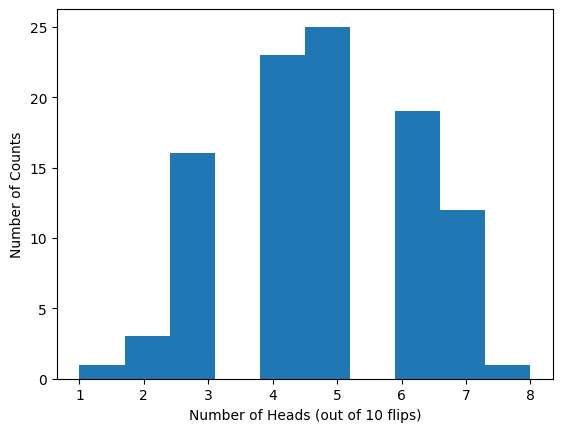

In [7]:
import numpy as np

def flip_10():
    # Flip a coin 10 times.
    flip = np.random.choice(['H', 'T'], size=10)
    # count flips
    num_heads = 0
    num_tails = 0
    for x in flip:
        if x == 'H':
            num_heads += 1
        else:
            num_tails += 1
    return num_heads, num_tails

# ten flips all land on heads
p_heads = 0.5
num_flips = 10
print(f"(a) p = {pow(p_heads, num_flips)}")

num_rounds = 100
heads_list = []
tails_list = []
for door in range(num_rounds):
    heads, tails = flip_10()
    heads_list.append(heads)
    tails_list.append(tails)

plt.hist(heads_list)
plt.xlabel('Number of Heads (out of 10 flips)')
plt.ylabel('Number of Counts')
plt.show()


(c) I am very confident that the coin is not fair because the probability of landing on heads 10x is not close to the independent probability of heads (0.5). If I were to run a statistical analysis, the p-value would show statistical significance.

Exercise 3: Statistical Independence
------------------------------------

You are given a sample of draws from a two-dimensional distribution for $X$ and $Y$. Make histograms of the marginal distribution of $x$ given certain ranges of $y$ values. Are $x$ and $y$ statistically independent?

Text(0, 0.5, 'Distribution')

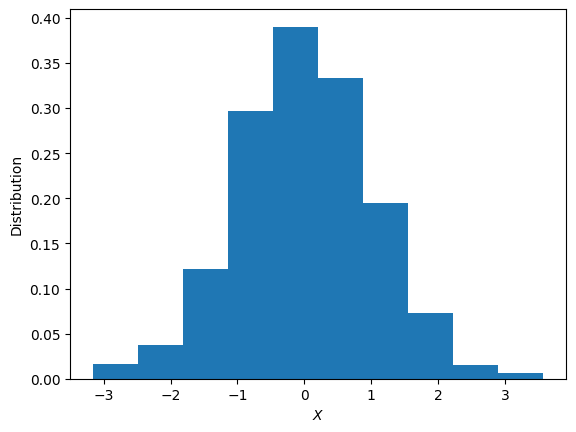

In [8]:
import numpy as np
import matplotlib.pyplot as plt

data = np.genfromtxt('Class_2_Exercise_3.csv')
door = data[:, 0]
y = data[:, 1]

plt.hist(door, density=True)
plt.xlabel(r'$X$')
plt.ylabel(r'Distribution')

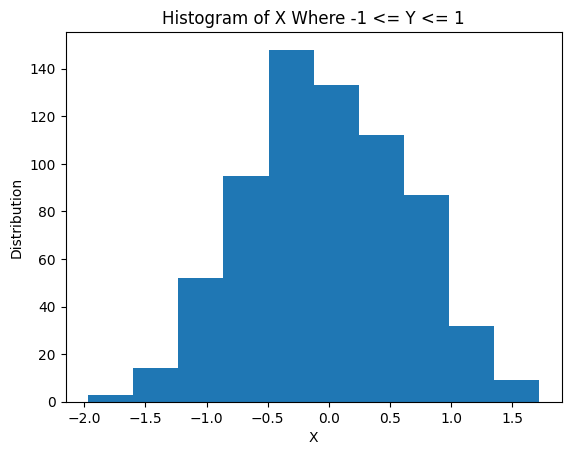

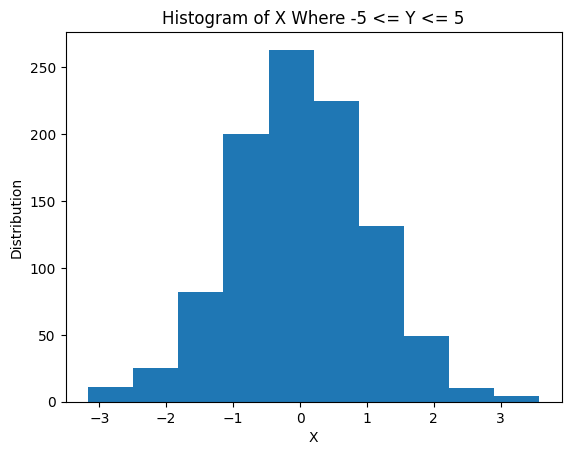

In [9]:
import csv

def find_in_range(low, high, data):
    x_list = []
    for nums in data:
        if low <= nums[1] <= high:
            x_list.append(nums[0])
    return x_list

# get data
with open("Class_2_Exercise_3.csv", 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=' ')

    data_list = []
    for row in reader:
        data = float(row[0]), float(row[1])
        data_list.append(data)

# test 1 [-1, 1]
low = -1
high = 1
x_list = find_in_range(low, high, data_list)

plt.hist(x_list)
plt.title('Histogram of X Where -1 <= Y <= 1')
plt.xlabel('X')
plt.ylabel('Distribution')
plt.show()

# test 2 [-5, 5]
low = -5
high = 5
x_list = find_in_range(low, high, data_list)

plt.hist(x_list)
plt.title('Histogram of X Where -5 <= Y <= 5')
plt.xlabel('X')
plt.ylabel('Distribution')
plt.show()


I can infer that X and Y are statistically independent because the graphs of Test 1 and Test 2 are very similar, and they are also comparable to the histogram of the entire distribution.

Exercise 4: Monty Hall Problem
------------------------------

The Monty Hall problem is a famous puzzle in statistics that has confused statisticans and laypeople alike. It goes back to the game show "Let's Make a Deal" with the host Monty Hall. In the show, contestants have to choose one out of three doors. Behind one of them is a prize such as a car. Behind the other two are goats (which the contestants don't get to keep). Not having any information, the contestants initially have a 1/3 chance to pick the right door and win the car.

Monty Hall knows behind which door the car is. After the contestant made their initial choice, Monty Hall **always** opens one door that the contestant has not chosen and contains a goat. (In case the contestant initially chooses the car, Monty Hall will open one of the two possible doors at random.) The host then offers the contestant to switch their choice. Should they switch doors?

(a) Solve the problem analytically and discuss your results with at least 3 other students.

(b) Run 10,000 simulations were the contestant always switches and 10,000 where they don't. How often do they win the car in each case? Compare this to your answer in part (a).

Contestant's initial pick has a 1/3 chance of being a car.
If the contestant does not switch, win probability remains at 1/3.
If the contestant does switch, win probability goes to 2/3 because one of the wrong doors (with a 1/3 probability of being picked) is eliminated.

In [71]:
import random

door_list = list(range(3))


# run through door opening sequence
# input: boolean switch
# output: boolean win
def monty_hall(switch):
    car_door = random.choice(door_list)
    contestant_door = random.choice(door_list)
    other_door = -1

    # pick other door that is not car door or contestant door (one option)
    if contestant_door != car_door:
        other_door = int(set(door_list).difference({contestant_door, car_door}).pop())
    # pick other door that is not car door (two options)
    if contestant_door == car_door:
        goat_list = list(set(door_list).difference({contestant_door}))
        other_door = random.choice(goat_list)

    # contestant switch to door that is not other door or original contestant door
    if switch:
        contestant_door = int(set(door_list).difference({contestant_door, other_door}).pop())

    return contestant_door == car_door

def main():
    num_rounds = 10_000
    no_switch_wins = 0
    switch_wins = 0
    for x in range(num_rounds):
        # run monty hall 10000 times no switch
        if monty_hall(False):
            no_switch_wins += 1
        # run monty hall 10000 times switch
        if monty_hall(True):
            switch_wins += 1

    print(f"When contestant does not switch door: {no_switch_wins / num_rounds * 100:.2f}% win.")
    print(f"When contestant does switch doors: {switch_wins / num_rounds * 100:.2f}% win.")

main()


When contestant does not switch door: 33.55% win.
When contestant does switch doors: 66.78% win.
